<a href="https://colab.research.google.com/github/StupichevA/Linal_Lab_PCA/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Matrix:
    def __init__(self, rows, cols, data=None):
        """
        Инициализация матрицы

        :param rows: количество строк
        :param cols: количество столбцов
        :param data: двумерный список элементов (по умолчанию нулевая матрица)
        """
        self.rows = rows
        self.cols = cols

        if data is not None:
            # Проверяем, что данные соответствуют указанным размерам
            if len(data) != rows or any(len(row) != cols for row in data):
                raise ValueError("Размеры данных не соответствуют указанным rows и cols")
            self.data = data
        else:
            # Создаем нулевую матрицу
            self.data = [[0 for _ in range(cols)] for _ in range(rows)]

    def sum(self, other):
        """Сложение матриц"""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Матрицы должны быть одного размера для сложения")

        result = Matrix(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result.data[i][j] = self.data[i][j] + other.data[i][j]
        return result

    def increase(self, scalar):
        """Умножение матрицы на скаляр"""
        if not isinstance(scalar, (int, float)):
            raise ValueError("Можно умножать только на скаляр (число)")

        result = Matrix(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result.data[i][j] = self.data[i][j] * scalar
        return result

    def mult(self, other):
        """Умножение матриц (используем оператор @)"""
        if self.cols != other.rows:
            raise ValueError("Количество столбцов первой матрицы должно равняться количеству строк второй")

        result = Matrix(self.rows, other.cols)
        for i in range(self.rows):
            for j in range(other.cols):
                sum_val = 0
                for k in range(self.cols):
                    sum_val += self.data[i][k] * other.data[k][j]
                result.data[i][j] = sum_val
        return result

    def get_column(self, col_index):
        """Получение столбца по индексу"""
        if col_index < 0 or col_index >= self.cols:
            raise IndexError("Индекс столбца вне допустимого диапазона")

        return [row[col_index] for row in self.data]

    def det(self): # Вычисление определителя с помощью Гаусса
      m = [[self.data[i][j] for j in range(self.cols)] for i in range(self.rows)]
      n = self.rows
      det = 1

      for i in range(n):

          x = i
          if m[i][i] == 0:
              flag = True
              for y in range(i + 1, n):
                  if m[y][i] != 0:
                      flag = False
                      x = y
                      break
              if flag:
                  return 0
              else:
                  m[i], m[x] = m[x], m[i]
                  det *= -1

          det *= m[i][i]
          for j in range(i + 1, n):
              factor = m[j][i] / m[i][i]
              for k in range(i, n):
                  m[j][k] -= factor * m[i][k]

      return det

    def corner_det(self, n):
      if not 1 <= n <= min(self.rows, self.cols):
          raise ValueError(f"Некорректный порядок минора n={n} для матрицы {self.rows}x{self.cols}")

      # Создаём подматрицу из первых n строк и столбцов
      minor_data = [[self.data[i][j] for j in range(n)] for i in range(n)]
      minor = Matrix(n, n, minor_data)

      return minor.det()

    def __str__(self):
        """Строковое представление матрицы"""
        return '\n'.join([' '.join(map(str, row)) for row in self.data])


# Пример использования
if __name__ == "__main__":
    # Создаем матрицы
    m1 = Matrix(2, 3, [[1, 2, 3], [4, 5, 6]])
    m2 = Matrix(2, 3, [[6, 5, 4], [3, 2, 1]])
    m3 = Matrix(3, 2, [[1, 2], [3, 4], [5, 6]])

    print("Матрица 1:")
    print(m1)
    print("\nМатрица 2:")
    print(m2)
    print("\nМатрица 3:")
    print(m3)

    # Сложение матриц
    print("\nСложение матриц 1 и 2:")
    print(m1.sum(m2))

    # Умножение на скаляр
    print("\nУмножение матрицы 1 на 2:")
    print(m1.increase(2))

    # Умножение матриц
    print("\nУмножение матриц 1 и 3:")
    print(m1.mult(m3))

    # Получение столбца
    print("\nВторой столбец матрицы 1:")
    print(m1.get_column(1))

    m5 = Matrix(3, 3, [[1, 2, 3], [1, 5, 6], [1, 3, 5]])
    print('\ndet', m5.corner_det(3))


Матрица 1:
1 2 3
4 5 6

Матрица 2:
6 5 4
3 2 1

Матрица 3:
1 2
3 4
5 6

Сложение матриц 1 и 2:
7 7 7
7 7 7

Умножение матрицы 1 на 2:
2 4 6
8 10 12

Умножение матриц 1 и 3:
22 28
49 64

Второй столбец матрицы 1:
[2, 5]

det 3.0


In [ ]:
def gauss_solver(A: Matrix, b: Matrix):
    """
    Вход:
    A: матрица коэффициентов (n×n). Используется класс Matrix из предыдущей
    лабораторной работы→
    b: вектор правых частей (n×1)
    Выход:
    Raises:
    list[Matrix]: список базисных векторов решения системы
    ValueError: если система несовместна
    """

    # assert m == [[]], 'Matrix is empty'
    # assert len(m) != len(m[0]), 'Not square matrix'

    # Приводим к ступенчатому виду
    A = A.data
    b = b.data
    n = len(A)
    lead = [0] * n
    shift = 0
    i = 0

    while i + shift < n:  # проходимся по строкам

        x = i
        col = i + shift
        if A[x][col] == 0:
            flag = True
            for y in range(x + 1, n):
                if A[y][col] != 0:
                    flag = False
                    x = y
                    break
            if flag:
                shift += 1
                continue
            else:
                A[i], A[x] = A[x], A[i]
                b[i], b[x] = b[x], b[i]

        for j in range(i + 1, n):
            factor = A[j][col] / A[i][col]
            b[j][0] -= factor * b[i][0]
            for k in range(col, n):
                A[j][k] -= factor * A[i][k]

        lead[i] = i + shift
        i += 1


    solution = [0] * n
    free_vars = [True] * n
    rank = i

    for row in range(n):
        col = lead[row]
        solution[col] = b[row]
        free_vars[col] = False

    # Построение базиса фундаментальной системы решений
    basis = []
    nullity = n - rank  # Размерность пространства решений

    for i in range(nullity):
        # Находим свободную переменную
        free_col = -1
        for col in range(n):
            if free_vars[col]:
                free_col = col
                break

        if free_col == -1:
            break

        # Создаем вектор решения
        basis_vector = [0] * n
        basis_vector[free_col] = 1

        # Находим значения зависимых переменных
        for row in range(rank):
            col = lead[row]
            basis_vector[col] = -A[row][free_col]

        basis.append(basis_vector)
        free_vars[free_col] = False

    return basis

In [ ]:
if __name__ == "__main__":
    # Пример 1: Одно решение
    A1 = Matrix(3,3,[
        [2, 1, -1],
        [-3, -1, 2],
        [-2, 1, 2]
    ])
    b1 = Matrix(3,1,[[8], [-11], [-3]])

    print("Пример 1 (одно решение):")
    res1 = gauss_solver(A1, b1)
    print(res1)

    # Пример 2: Бесконечно много решений
    A2 = Matrix(3,3,[
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    b2 = Matrix(3,1,[[1], [2], [3]])

    print("\nПример 2 (бесконечно много решений):")
    res2 = gauss_solver(A2, b2)
    print(res2)

    # Пример 4: Однородная система
    A4 = Matrix(3,3,[
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]
    ])
    b4 = Matrix(3,1,[[1], [1], [1]])
    print("\nПример 4 (однородная система):")
    res4 = gauss_solver(A4,b4)
    print(res4)

Пример 1 (одно решение):
[]

Пример 2 (бесконечно много решений):
[[-3, 6.0, 1]]

Пример 4 (однородная система):
[[-2, 1, 0], [-3, 0, 1]]


In [ ]:
def center_data(X: Matrix) -> Matrix:
  """
  Вход: матрица данных X (n×m)
  Выход: центрированная матрица X_centered (n×m)
  """
  cols = X.cols
  rows = X.rows
  Centered_X = Matrix(rows, cols)
  Centered_X.data = [row.copy() for row in X.data]

  means = [sum(X.get_column(i)) / rows for i in range(cols)]

  for row in range(rows):
    for col in range(cols):
      Centered_X.data[row][col] -= means[col]

  return Centered_X

X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
print(center_data(X))
print(X)

0.0 -1.0 -1.666666666666667
0.0 0.0 0.33333333333333304
0.0 1.0 1.333333333333333
1 2 3
1 3 5
1 4 6


In [ ]:
def T(X: Matrix) -> Matrix:
  cols = X.cols
  rows = X.rows
  X_T = Matrix(rows, cols)
  X_T.data = [row.copy() for row in X.data]

  for row in range(rows//2 + 1):
    for col in range(cols//2 + 1):
      X_T.data[row][col], X_T.data[col][row] = X_T.data[col][row], X_T.data[row][col]

  return X_T


In [ ]:
def covariance_matrix(X_centered: Matrix) -> Matrix:
  """
  Вход: центрированная матрица X_centered (n×m)
  Выход: матрица ковариаций C (m×m)
  """
  cols = X_centered.cols
  rows = X_centered.rows
  E = T(X_centered).mult(X_centered).increase(1/(rows + 1))

  return E

X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
print(covariance_matrix(center_data(X)))

0.0 -0.41666666666666674 -0.6388888888888888
0.0 0.08333333333333326 0.111111111111111
0.0 0.33333333333333326 0.5277777777777775


In [ ]:
def sturm_sequence(A: Matrix, lambd: float):
    """Последовательность Штурма для матрицы A и значения λ"""
    n = A.rows
    A_l = Matrix(n, A.cols)

    for i in range(n):
      for j in range(A.cols):
          A_l.data[i][j] = A.data[i][j]
      A_l.data[i][i] -= lambd

    D = [1, A_l.data[0][0]]
    for i in range(2, n + 1):
      D.append(A_l.corner_det(i))

    return D

def count_sign_changes(sequence):
    """Подсчет числа перемен знака в последовательности"""
    count = 0
    for i in range(1, len(sequence)):
        if sequence[i-1]*sequence[i] < 0:
            count += 1
    return count

def bisection_eigenvalues(A, a, b, epsilon=1e-6, max_depth=10):
    """Нахождение собственных значений методом бисекции"""
    eigenvalues = []

    def bisect(a, b, depth=0):
        nonlocal eigenvalues

        if depth > max_depth:
            return

        s_a = count_sign_changes(sturm_sequence(A, a))
        s_b = count_sign_changes(sturm_sequence(A, b))


        n_eigen = abs(s_b - s_a)

        if n_eigen == 0:
            return
        elif n_eigen == 1:
            while b - a > epsilon:
                mid = (a + b)/2
                s_mid = count_sign_changes(sturm_sequence(A, mid))
                if s_mid - s_a == 0:
                    a = mid
                else:
                    b = mid
            eigenvalues.append((a + b)/2)
        else:
            mid = (a + b)/2
            bisect(a, mid, depth+1)
            bisect(mid, b, depth+1)

    bisect(a, b)
    return sorted(eigenvalues)

In [ ]:
M = Matrix(2,2,[[4,2],[2,9]])
bisection_eigenvalues(M, -10, 10)


[3.2984378933906555, 9.701562225818634]

In [ ]:
def find_eigenvectors(C: Matrix, eigenvalues: list[float]) -> list[Matrix]:
    """
    Вход:
    C: матрица ковариаций (m×m)
    eigenvalues: список собственных значений
    Выход: список собственных векторов (каждый вектор - объект Matrix)
    """
    n = C.rows
    m = C.cols
    I = Matrix(n,m)
    Z = Matrix(n,1)
    for i in range(n):
      for j in range(m):
        if i!=j:
          I.data[i][j] = 0
        else:
          I.data[i][j] = 1

    eigenvectors = []
    for l in eigenvalues:
        eigenvectors.append(gauss_solver(C.sum(I.increase(-l)), Z))


In [ ]:
def explained_variance_ratio(eigenvalues: list[float], k: int) -> float:
    """
    Вход:
    eigenvalues: список собственных значений
    k: число компонент
    Выход: доля объяснённой дисперсии
    """
    return sum(eigenvalues[:k]) / sum(eigenvalues)



In [ ]:
def project_data(X: Matrix, components: Matrix) -> Matrix:
    """Проецирование данных на главные компоненты."""
    n_samples = len(X)
    k = len(components)

    projected = [[0.0] * k for _ in range(n_samples)]

    for i in range(n_samples):
        for j in range(k):
            projected[i][j] = sum(X[i][l] * components[j][l] for l in range(len(X[0])))

    return projected

In [ ]:
def pca(X: Matrix, k: int) -> tuple[Matrix, float]:
    """
    Вход:
    X: матрица данных (n×m)
    k: число главных компонент
    Выход:
    X_proj: проекция данных (n×k)
    : доля объяснённой дисперсии
    """
    X_centered = center_data(X)

    cov_matrix = compute_covariance_matrix(X_centered)

    eigenvalues = bisection_eigenvalues(covariance_matrix)
    eigenvectors = find_eigenvectors(X, eigenvalues)

    top_k_eigenvectors = [eigenvectors[i] for i in sorted_indices[:k]]

    projected_data = project_data(X_centered, top_k_eigenvectors)

    explained_variance = explained_variance_ratio(eigenvectors, k)

    return projected_data, explained_variance

In [ ]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg
import io

def plot_pca_projection(X_proj: 'Matrix') -> Figure:
    """
    Вход: проекция данных X_proj (n×2)
    Выход: объект Figure из Matplotlib
    """
    fig = Figure(figsize=(6, 6))
    canvas = FigureCanvasAgg(fig)
    ax = fig.add_subplot(111)

    x = [row[0] for row in X_proj]
    y = [row[1] for row in X_proj]

    ax.scatter(x, y, alpha=0.7, edgecolors='w', s=40)

    ax.set_title('2D Projection via PCA', pad=15)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.grid(True, linestyle='--', alpha=0.6)

    return fig


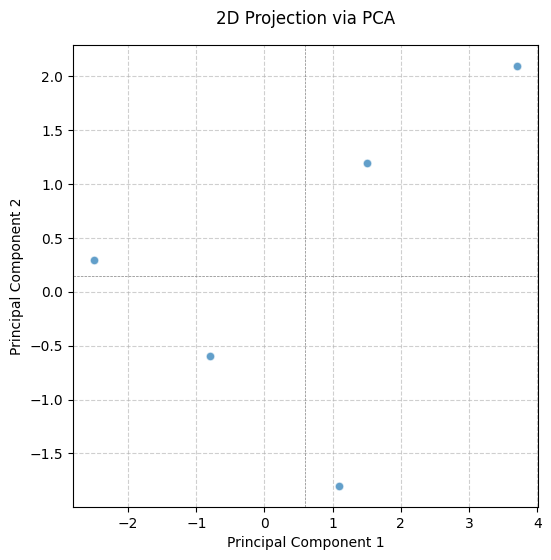

In [ ]:
projected_data = [
    [-2.5, 0.3],
    [1.1, -1.8],
    [3.7, 2.1],
    [-0.8, -0.6],
    [1.5, 1.2]
]

fig = plot_pca_projection(projected_data)
fig

In [ ]:
def reconstruction_error(X_orig:'Matrix', X_recon:'Matrix') -> float:
    """
    Вход:
    X_orig: исходные данные (n×m)
    X_recon: восстановленные данные (n×m)
    Выход: среднеквадратическая ошибка MSE
    """
    n = X_orig.rows
    m = X_orig[0].cols
    total_squared_error = 0.0

    for i in range(n_samples):
        for j in range(n_features):
            total_squared_error += (X_orig[i][j] - X_recon[i][j]) ** 2

    return total_squared_error / (n * m)